### Testing on full dataset

In [1]:
import DataProcess as DP
import glob
import time
import pandas as pd
from plotting_tools import plot_feature_distributions

In [2]:
protocol_datadir = '/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/'
optional_datadir = '/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Optional/'

In [3]:
allfiles = list(glob.glob(protocol_datadir+'*.dat'))+list(glob.glob(optional_datadir+'*.dat'))

In [4]:
#Eventually we'll need these for all subjects
HR_rest,HR_max=75,193

#### Load all the data and combine the result into a single dataframe

In [5]:
start = time.time()
all_dfs = []
for fname in allfiles:
    print(fname)
    dp = DP.dataprocess(fname,HR_rest,HR_max)
    all_dfs.append(dp.df)

feature_df = pd.concat(all_dfs)
end = time.time()

/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject101.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject102.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject103.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject104.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject105.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject106.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject107.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject108.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol/subject109.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Optional/subject101.dat
/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2

In [7]:
print(end-start)

114.63516116142273


Pretty fast! Considering this includes time taken to load the data too

#### Test plotting functionality

In [8]:
feature_df.head()

,heart_rate_mean,hand_temp_mean,hand_acc16g_x_mean,hand_acc16g_y_mean,hand_acc16g_z_mean,hand_gyro_x_mean,hand_gyro_y_mean,hand_gyro_z_mean,hand_mag_x_mean,hand_mag_y_mean,...,ankle_acc16g_x_peak,ankle_acc16g_y_peak,ankle_acc16g_z_peak,ankle_gyro_x_peak,ankle_gyro_y_peak,ankle_gyro_z_peak,ankle_mag_x_peak,ankle_mag_y_peak,ankle_mag_z_peak,activityID
0,93.220339,30.500000,-8.843893,0.116248,3.155562,0.589752,-0.550095,0.929394,7.433115,39.973011,...,15.252700,9.75972,9.76370,2.609650,1.268790,3.461520,117.2680,46.5085,54.1084,1.0
1,94.406780,30.505833,0.461852,6.880346,6.926895,-0.131100,-0.127059,-0.082852,-28.119916,16.863409,...,2.461230,10.76010,5.54433,0.466296,0.239456,0.657250,23.3701,39.4369,20.4161,1.0
2,95.593220,30.522500,0.315599,5.534308,8.055644,0.127547,-0.028284,-0.018796,-30.659808,19.428375,...,3.390960,29.71820,12.87120,0.942810,0.434630,0.838442,21.2676,44.6298,21.2845,1.0
3,97.523164,30.562500,0.313555,5.662822,7.999244,-0.002964,0.009607,-0.007301,-31.043741,18.312901,...,0.793546,8.45641,6.06701,0.163835,0.060950,0.091133,15.3688,44.9404,10.8489,1.0
4,97.966102,30.562500,0.306364,5.622200,8.032629,0.019049,0.003301,-0.013055,-31.151695,18.376472,...,0.796365,8.37685,6.26134,0.096145,0.064025,0.047409,15.8144,45.2229,10.2201,1.0


In [9]:
activities_to_plot=[2,9,10,5,6,11,12]
features_to_plot=['mean','median','std','peak']

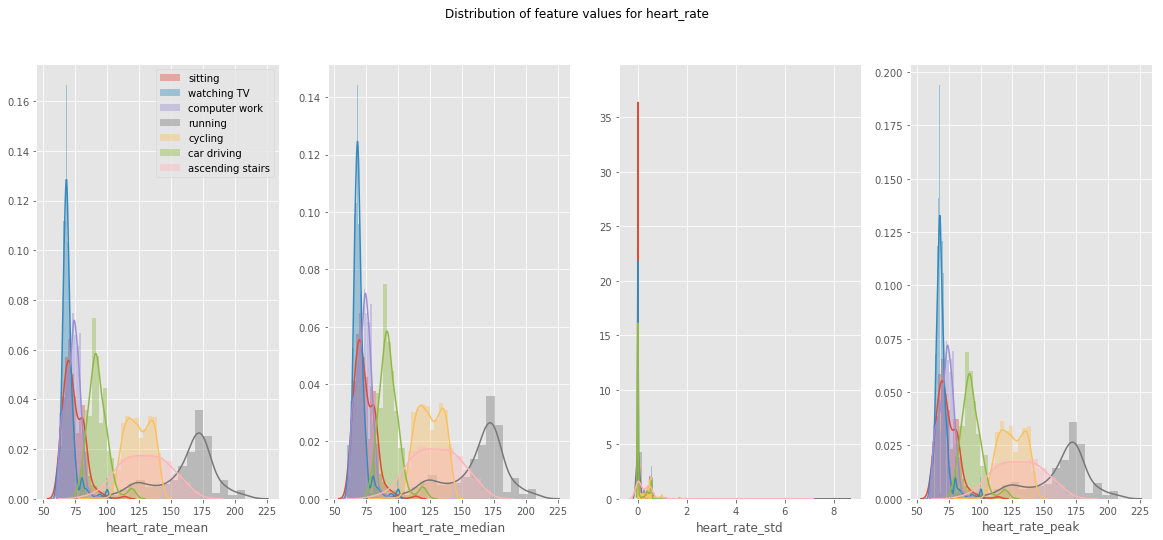

In [10]:
fig = plot_feature_distributions('heart_rate',features_to_plot,activities_to_plot,data=feature_df)